In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Getting Data and doing some sanity checks

In [6]:
wine = pd.read_csv("../assets/winequality-red.csv",sep=';')

In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## There are no null values in dataset. It's pretty clean dataset. No data cleaning has done. And all the data is having numerical values. But we should standardize the data before using into models. Because most of the algorithms assume that all the features are centered around zero and have same variance. We will do that in later stages.

## Going to check how the features are correlated with each other. Here am just doing for White wine data. In case if we have lots of features in the dataset. It is best practise to check which features are more correlated with the target variable. The model will give more reliable output when we pass significant features into the model.

In [11]:
import seaborn as sns

Text(0.5, 1, 'Correlation between variables')

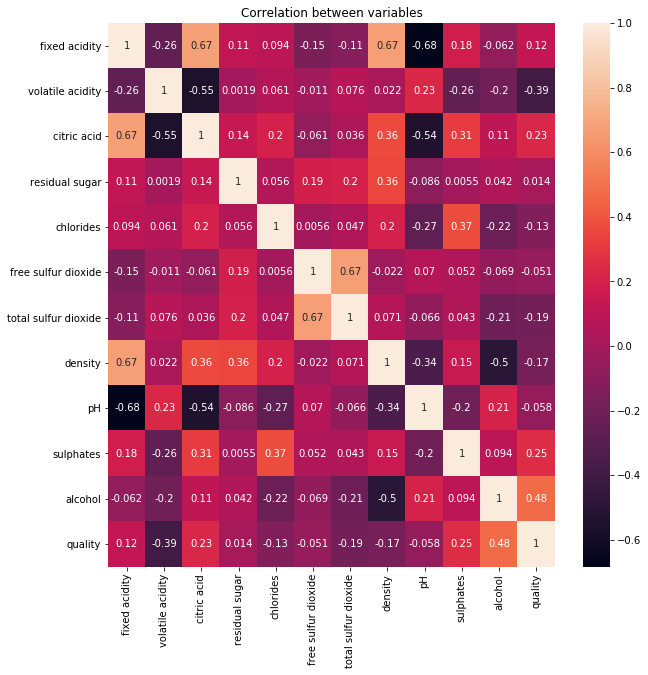

In [12]:
    corr = wine.corr()
    fig, ax = plt.subplots(figsize = (10,10))
    g= sns.heatmap(corr,ax=ax, annot= True)
    ax.set_title('Correlation between variables')

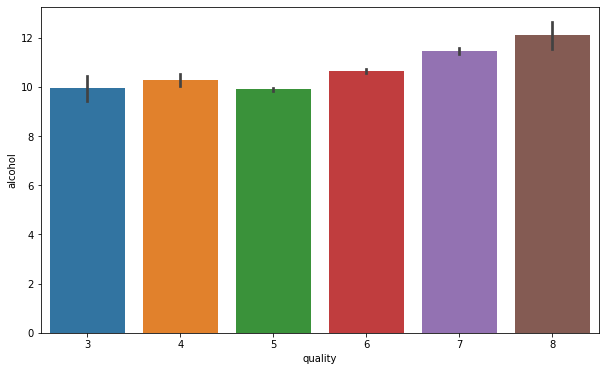

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Here am taking all the features as predictors but we can eliminate pH, free sulfur dioxide, residual sugar features from predictor list. Becase they are not much correlated with target variable "Quality".

In [18]:
y = wine.quality
X = wine.drop('quality',axis = 1)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state = 0, stratify = y)

In [21]:
from sklearn import preprocessing

## Here am using standarscaler function to standardize the data. We can use other methods also to do this. But this function will make sure the test data also standardized based on training data mean. 

In [22]:
scaler = preprocessing.StandardScaler().fit(train_x)
train_x_scaled = scaler.transform(train_x)

In [23]:
test_x_scaled = scaler.transform(test_x)

## Cross validating the most common regression models to find which algorithm works better

In [24]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [25]:
models = []
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('GradienBoost', GradientBoostingRegressor()))
models.append(('SVR', SVR()))
names = []

In [26]:
for name,model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=2)
    cv_results = model_selection.cross_val_score(model,train_x_scaled,train_y, cv= kfold, scoring = 'neg_mean_absolute_error')
    names.append(name)
    msg  = "%s: %f" % (name, -1*(cv_results).mean())
    print(msg)

/Users/kristinaklyap/.virtualenvs/aiinb/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/kristinaklyap/.virtualenvs/aiinb/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DecisionTree: 0.507106
RandomForest: 0.446693


/Users/kristinaklyap/.virtualenvs/aiinb/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GradienBoost: 0.501865


/Users/kristinaklyap/.virtualenvs/aiinb/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVR: 0.477310


## Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works. From above results we can decide that Random Forest model works better than other models for our data.
## For classification models , we will use accuracy score and confusion matrix to validate across the models. Accuracy score should be high for best results.

In [27]:
model = RandomForestRegressor()
model.fit(train_x_scaled,train_y)
pred_y = model.predict(test_x_scaled)

In [28]:
mean_absolute_error(pred_y,test_y)

0.39649999999999996

In [29]:
test_y.head()

499     6
683     5
840     7
1335    6
1148    6
Name: quality, dtype: int64

In [33]:
pred_y

In [26]:
RandomForestRegressor?

## Below am going to find the parameter n_estimator, to tune the model for better result. The same way we can find other paramters also. 

In [34]:
def get_mae_rf(num_est, predictors_train, predictors_val, targ_train, targ_val):

    # fitting model with input max_leaf_nodes
    model = RandomForestRegressor(n_estimators=num_est, random_state=0)

    # fitting the model with training dataset
    model.fit(predictors_train, targ_train)

    # making prediction with the test dataset
    preds_val = model.predict(predictors_val)

    # calculate and return the MAE
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [37]:
plot_mae = {}
for num_est  in range(2,50):
    my_mae = get_mae_rf(num_est,train_x_scaled,test_x_scaled,train_y,test_y)
    plot_mae[num_est] = my_mae

In [38]:
plt.plot(list(plot_mae.keys()),plot_mae.values())
plt.show()

* ## The mae is less after 36. Lets check how much performance is improved by passing this parameter into the model

In [39]:
model = RandomForestRegressor(n_estimators=36)
model.fit(train_x_scaled,train_y)
pred_y = model.predict(test_x_scaled)

In [40]:
mean_absolute_error(pred_y,test_y)